In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# 1. Total Participants per Country
df = pd.read_excel('/content/data_new.xlsx')

df['Total'] = df.sum(axis=1, numeric_only=True)
df1_sum = df.loc[:, ['COUNTRY','Status','Total']]
df1_sum

,COUNTRY,Status,Total
0,Austria,MS,346
1,Belgium,MS,157
2,Bulgaria,MS,951
3,Czech Republic,MS,224
4,Denmark,MS,412
5,Estonia,MS,149
6,Finland,MS,564
7,France,MS,536
8,Germany,MS,1219
9,Greece,MS,1094


In [6]:
#Grouping countries TOTAL participation throughtout the years
df2 = pd.read_excel('/content/data_new.xlsx', sheet_name='CERN OS&NMS')

# create new total colum...being the sum of all numerical columns
df2['Total']= df2.sum(numeric_only=True, axis=1)

#new dataframe with only 3 columns
df2_sum = df2.loc[:, ['COUNTRY','Status','Total']]
df2_sum


,COUNTRY,Status,Total
0,Japan,OS,12
1,Russia,OS,431
2,United States,OS,157
3,Algeria,NMS,11
4,Angola,NMS,15
...,...,...,...
73,Uruguay,NMS,4
74,Uzbekistan,NMS,1
75,Venezuela,NMS,1
76,Vietnam,NMS,5


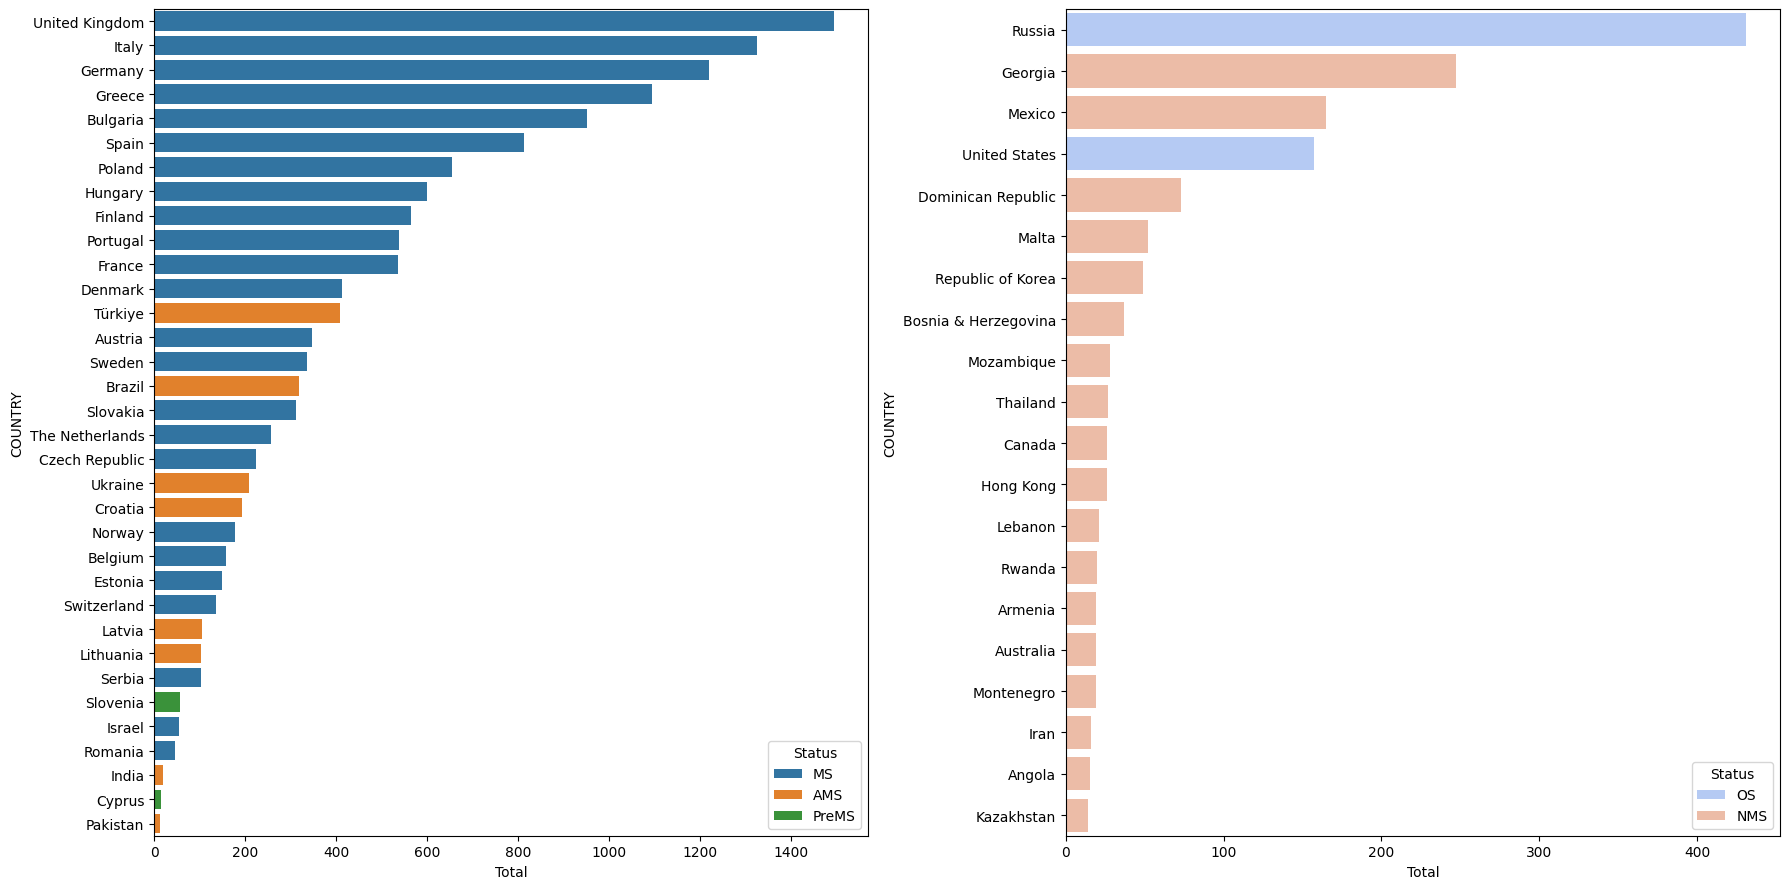

In [8]:
# 2. Trend Analysis per Country
df1_sum = df1_sum.sort_values(by='Total', ascending=False).reset_index(drop=True)
df2_sum = df2_sum.sort_values(by='Total', ascending=False).reset_index(drop=True)


fig, ax =plt.subplots(1,2, figsize=(18,9))
sns.barplot(y = df1_sum['COUNTRY'], x= df1_sum['Total'], ax=ax[0], data=df1_sum, hue='Status')
sns.barplot(y = df2_sum['COUNTRY'].head(20), x= df2_sum['Total'], ax=ax[1], data=df2_sum, hue='Status', palette='coolwarm')
fig.tight_layout()

fig.show()


In [9]:
#Merger of all countries from all Statuses from all datasets
df_merged = pd.concat([df1_sum,df2_sum], ignore_index=True)
df_merged

,COUNTRY,Status,Total
0,United Kingdom,MS,1494
1,Italy,MS,1324
2,Germany,MS,1219
3,Greece,MS,1094
4,Bulgaria,MS,951
...,...,...,...
107,Tajikistan,NMS,1
108,United Arab Emirates,NMS,1
109,Uzbekistan,NMS,1
110,Venezuela,NMS,1


In [10]:
# 3. Geographic Heat map Map of all Countries thats ever participated

fig = px.choropleth(df_merged, color='Total', hover_name='COUNTRY',
                    locations='COUNTRY', locationmode='country names',
                    color_continuous_scale='Reds',
                    projection='natural earth1',
                    title='Participating Countries')

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [11]:
df3 = pd.read_excel('/content/missing.xlsx')
df3


,COUNTRY
0,Afghanistan
1,Albania
2,Andorra
3,Antigua and Barbuda
4,Bahamas
...,...
89,Turkmenistan
90,Tuvalu
91,Vanuatu
92,Yemen


In [12]:
# 3. Geographic Map of the NON-ATTENDING Countries

fig = px.choropleth(df3, hover_name='COUNTRY',
                    locations='COUNTRY', locationmode='country names',
                    color_continuous_scale='Reds',
                    projection='natural earth1',
                    title='Participating Countries')
# fig.tit


fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In [34]:
#4. Comparison of attendence between the Member States(MS) and the AMS over the years

members_pg1 = df.groupby('Status').sum(numeric_only=True)
members_pg1.pop('Total')
# members_pg1.set_index('Status', inplace=True)
members_pg1

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Status,,,,,,,,,,,,,,,,,,,,,
AMS,0,0,0,0,0,0,0,0,0,1,...,180,125,139,145,38,0,28,96,99,15
MS,9,19,25,37,42,82,100,55,185,677,...,651,696,662,611,18,0,458,595,613,124
PreMS,0,0,0,0,0,0,1,0,6,7,...,0,5,0,24,0,0,0,12,1,0


In [35]:
# same procedure for our other data set including members of other statuses
members_pg2 = df2.groupby('Status').sum(numeric_only=True)
members_pg2.pop('Total')
members_pg2

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Status,,,,,,,,,,,,,,,,,,,,,
NMS,0,0,0,2,1,0,2,2,3,7,...,82,101,74,91,24,0,70,87,114,15
OS,0,5,4,5,5,6,2,1,5,6,...,40,25,31,33,0,0,10,11,10,0


In [36]:
#Merger of all members from all STATUSES from the different datasets
members_merge = pd.concat([members_pg1, members_pg2])
members_merge

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Status,,,,,,,,,,,,,,,,,,,,,
AMS,0,0,0,0,0,0,0,0,0,1,...,180,125,139,145,38,0,28,96,99,15
MS,9,19,25,37,42,82,100,55,185,677,...,651,696,662,611,18,0,458,595,613,124
PreMS,0,0,0,0,0,0,1,0,6,7,...,0,5,0,24,0,0,0,12,1,0
NMS,0,0,0,2,1,0,2,2,3,7,...,82,101,74,91,24,0,70,87,114,15
OS,0,5,4,5,5,6,2,1,5,6,...,40,25,31,33,0,0,10,11,10,0


In [37]:
#dropping the years 2020 nad 2021 due to inactivity caused by COVID-19
members_merge = members_merge.drop(columns=[2020, 2021, 2025])
members_merge


,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2022,2023,2024
Status,,,,,,,,,,,,,,,,,,,,,
AMS,0,0,0,0,0,0,0,0,0,1,...,67,121,154,180,125,139,145,28,96,99
MS,9,19,25,37,42,82,100,55,185,677,...,820,974,775,651,696,662,611,458,595,613
PreMS,0,0,0,0,0,0,1,0,6,7,...,0,0,2,0,5,0,24,0,12,1
NMS,0,0,0,2,1,0,2,2,3,7,...,61,58,74,82,101,74,91,70,87,114
OS,0,5,4,5,5,6,2,1,5,6,...,55,42,63,40,25,31,33,10,11,10


In [38]:
# We now we try transform our desired x-axis into a column first so we can use
# it to our pyplot func.
members_merge = members_merge.T
members_merge

members_merge = members_merge.reset_index()
members_merge= members_merge.rename(columns={'index': 'Year'})
members_merge

Status,Year,AMS,MS,PreMS,NMS,OS
0,1998,0,9,0,0,0
1,1999,0,19,0,0,5
2,2000,0,25,0,0,4
3,2001,0,37,0,2,5
4,2002,0,42,0,1,5
5,2003,0,82,0,0,6
6,2004,0,100,1,2,2
7,2005,0,55,0,2,1
8,2006,0,185,6,3,5
9,2007,1,677,7,7,6


In [40]:
# normalized the status per member countries' count
members_merge['MS'] = members_merge['MS']/24
members_merge['AMS'] = members_merge['AMS']/8
members_merge['PreMS'] = members_merge['PreMS']/2
members_merge['NMS'] = members_merge['MS']/75
members_merge['OS'] = members_merge['MS']/3
# members_merge

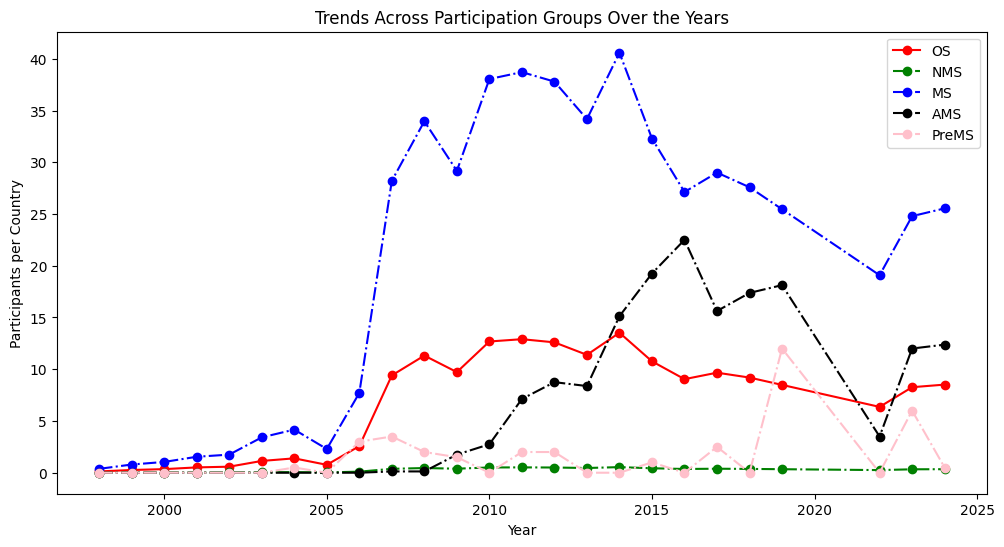

In [41]:
#A simple trend plot displaying the participation of members of different statuses
#   over the years. note that the years 2020 & 2021 were excluded due to COVID


plt.figure(figsize=(12, 6))

plt.plot(members_merge['Year'], members_merge['OS'], label="OS", color="red", linestyle = '-', marker = 'o')
plt.plot(members_merge['Year'], members_merge['NMS'], label="NMS", color="green", linestyle = '-.', marker = 'o')
plt.plot(members_merge['Year'], members_merge['MS'], label="MS", color="blue", linestyle = '-.', marker = 'o')
plt.plot(members_merge['Year'], members_merge['AMS'], label="AMS", color="black", linestyle = '-.', marker = 'o')
plt.plot(members_merge['Year'], members_merge['PreMS'], label="PreMS", color="pink", linestyle = '-.', marker = 'o')



plt.title("Trends Across Participation Groups Over the Years")
plt.xlabel("Year")
plt.ylabel("Participants per Country")
plt.legend()
plt.show()